# Deal with Data

## 1. 处理最初的数据集

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

url = '/mnt/data/Project7/fakenews/csv/'
# 将时间局限在事件范围内的所有帖子都取出来.
# 这一步可能需要使用肉眼来观察这个时间的范围
# 可以通过 create_at 这个属性来看到这个帖子的发布时间

In [2]:
# df9 = pd.read_csv(url+'9.csv') # or 2.csv 3.csv...取决去topic所选择的时间
# # 需要通过 create_at 这个属性来看到这个帖子的发布时间,然后选择出这个时间段的所有数据
# # 当然也可以通过最开始 选择限定时间数据集的方法来限定时间

/home/shiqian/miniconda3/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (25,27,28,29,31,39,41,42,43,49,65,67,68,69) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
# 选择出相应的人群
high = pd.read_csv('data/up_points.csv',index_col=0)['Id'].to_list()
low = pd.read_csv('data/low_points.csv',index_col=0)['Id'].to_list()

In [3]:
def filter_data_by_users(df:pd.DataFrame, userlist: list ,title:str):
    """
    df: 为限定完时间段的数据集
    userlist: 为峰的user名单
    title: 命名名单,保存为 'users[title]][alltweets].csv'
    """
    df = df[df['author.username'].isin(userlist)]
    df = df[['id','conversation_id','author.username','referenced_tweets.replied_to.id','referenced_tweets.retweeted.id','referenced_tweets.quoted.id','text']]
    # df.to_csv(f'users[{title}]][alltweets].csv')
    return df

def filter_author_tweet(df:pd.DataFrame) -> pd.DataFrame:
    """
    筛选出users们中texts中, 其中他们发布的帖子
    返回其发帖的dataframe
    """
    df_only_author = df[df['referenced_tweets.retweeted.id'].isna()]
    df_only_author = df_only_author[df_only_author['referenced_tweets.quoted.id'].isna()]
    df_only_author = df_only_author[df_only_author['referenced_tweets.replied_to.id'].isna()]
    return df_only_author

def filter_url(df:pd.DataFrame) -> pd.DataFrame:
    """
    对其发帖中的url进行处理, 删去其中的url
    """
    def wordopt(text):
        text = text.lower()
        # text = re.sub('\\n', '', text) # 删除换行符
        # text = re.sub('\[.*?\]', '', text) # 去掉中括号括起来的字符串
        text = re.sub('https?://\S+|www\.\S+', '', text) # 去掉网址
        # text = re.sub("\\W"," ",text) # 去掉非单词字符
        # text = re.sub('<.*?>+', '', text) # 去掉HTML, XML标签
        # text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # 将文本中所有标点符号删除
        # text = re.sub('\n', '', text) # 删除换行符
        # text = re.sub('\w*\d\w*', '', text) # 删除字母数字混合的“单词”
        return text
    
    df['text'] = df.text.apply(lambda x : wordopt(x))
    return df

def agg_text(df:pd.DataFrame, title:str) -> pd.DataFrame:
    """
    对其中的文本进行合并操作,
    title: 用于命名csv文件
    """
    user_texts = df.groupby(by='author.username').agg(text=("text", lambda x: "\n".join(set(x))))
    user_texts.reset_index(drop=False, inplace=True)
    user_texts.to_csv(f"all_tweet_user[{title}][agg].csv", index=False)
    return user_texts

def filter_data(df:pd.DataFrame, title:str, userlist:list) -> pd.DataFrame:
    df = filter_data_by_users(df, userlist, title)
    df = filter_author_tweet(df)
    df = filter_url(df)
    df = agg_text(df, title)
    return df

In [4]:
user_list = high.copy()
user_list.extend(low)
data_list = []
for i in range(9, 27+1):
    df_t = pd.read_csv(url+str(i)+'.csv')
    df_t = filter_data_by_users(df_t, user_list, 'all')
    data_list.append(df_t)
    print(i, end=' ')
data_list.reverse()
df = pd.concat(data_list, axis=0)

/home/shiqian/miniconda3/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (25,27,28,29,31,39,41,42,43,49,65,67,68,69) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


9 10 11 12 13 

/home/shiqian/miniconda3/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (25,27,28,29,31,39,41,42,43,65,67,68,69) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


14 15 16 17 18 

/home/shiqian/miniconda3/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (27,28,29,31,39,41,42,43,49,65,67,68,69) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


19 

/home/shiqian/miniconda3/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (27,28,29,31,39,41,42,43,65,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


20 21 22 23 

/home/shiqian/miniconda3/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (27,31,39,41,42,43,65,67,68,69) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


24 25 26 

/home/shiqian/miniconda3/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (27,28,29,31,39,41,42,43,65,67,68,69) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


27 

In [5]:
high_df = filter_data(df, 'top', high)
low_df = filter_data(df, 'low', low)

# Similarity Calculate

## 计算相似度

In [6]:
import os
# 为 jupter notebook 设置系统代理
# 否则可能无法连接到huggingface
proxy = 'http://192.168.50.182:7890'
os.environ['http_proxy'] = proxy
os.environ['HTTP_PROXY'] = proxy
os.environ['https_proxy'] = proxy
os.environ['HTTPS_PROXY'] = proxy
import pandas as pd
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm
# 查看是否有可用的gpu加速, 获取gpu的数量
print(torch.cuda.is_available(), torch.cuda.device_count())

True 1


In [7]:
from sentence_transformers import SentenceTransformer  # https://www.sbert.net/
import numpy as np

# 使用时会自动下载所需要的模型.  
# https://huggingface.co/BAAI/bge-large-en-v1.5
model = SentenceTransformer('BAAI/bge-large-en-v1.5', device='cuda')

def embedding(texts: 'list[str]') -> np.ndarray:
    """
    embedding获得text的list,
    并将每一个text进行embedding操作,
    返回每一个text的embedding结果.
    """
    embeddings = model.encode(texts, normalize_embeddings=True)
    return embeddings

def calculateSimilarity(a:np.ndarray, b:np.ndarray) -> np.ndarray:
    """
    计算两个embedding结果之间的相似度,以ndarray的形式输入,返回一个矩阵,表明其之间的相似度
    """
    return a @ b.T

In [62]:
# 测试样例.
# 在python 3.9.18 版本上能够成功使用. （3.7.16也可以）
text1 = ['sample1', 'sample2']
text2 = ['sample3', 'sample4']
embedding1 = embedding(text1)
embedding2 = embedding(text2)
print(embedding1)
print(embedding1 @ embedding2.T)

[[ 0.01565036  0.03648352  0.01993618 ... -0.00103826 -0.00561562
  -0.03185155]
 [ 0.00716442  0.04983097  0.04704395 ... -0.02127947 -0.0060233
  -0.01915274]]
[[0.82828635 0.83361506]
 [0.85577554 0.85415757]]


In [8]:
pd.read_csv("up_point_messages[all][agg].csv").value_counts(['text']).head(1)

text                                                                                                   
muslims spitting on food, hiding in mosques to spread coronavirus? beware of these 8 fake news stories     2593
dtype: int64

In [10]:
pd.read_csv("low_point_messages[all][agg].csv").value_counts(['text']).head(1)

text                                                                                                                                                                                                                   
new: justice sonia sotomayor said during oral arguments today that “we have over 100,000 children, which we’ve never had before, in serious condition, and many on ventilators” due to the coronavirus. that's false.      2513
dtype: int64

In [11]:
# 取出top点的text内容
# 根据实际内容
top_text = "muslims spitting on food, hiding in mosques to spread coronavirus? beware of these 8 fake news stories"

low_text = """
new: justice sonia sotomayor said during oral arguments today that “we have over 100,000 children, which we’ve never had before, in serious condition, and many on ventilators” due to the coronavirus. that's false.
"""

In [12]:
def alltexts_embedding_batches(all_text_path:str, topic:str):
    """
    输入一个user_text的目录,计算其关于topic的相关性大小
    """
    df_all_texts = pd.read_csv(all_text_path)
    all_texts = df_all_texts.text.to_list()
    names = df_all_texts['author.username'].to_list()
    
    # 将其拆分为100个子数组
    texts_batches = np.array_split(all_texts, 100)
    # 为了这个进度条?
    texts_batches = tqdm(texts_batches)
    all_texts_embedding = []
    for batch in texts_batches:
        batch_embedding = embedding(batch)
        all_texts_embedding += batch_embedding.tolist()

    all_texts_embedding = np.array(all_texts_embedding)
    topics_embedding = embedding([topic])
    similarity = calculateSimilarity(all_texts_embedding,topics_embedding)
    return similarity, names

In [13]:
def draw_and_calculate(path:str, topic:str, title:str):
    """
    计算并且绘图
    """
    similarity, names= alltexts_embedding_batches(path, topic)
    fig = plt.figure(figsize=(10,5))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    bins = [i for i in np.arange(0.3,0.8,0.01)]

    for i in range(len(similarity.T)):
        ax = fig.add_subplot(1, 1, i+1)
        ax.set_title(title)
        ax.hist(similarity.T[i], bins)
    
    return similarity, names

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [02:01<00:00,  1.22s/it]


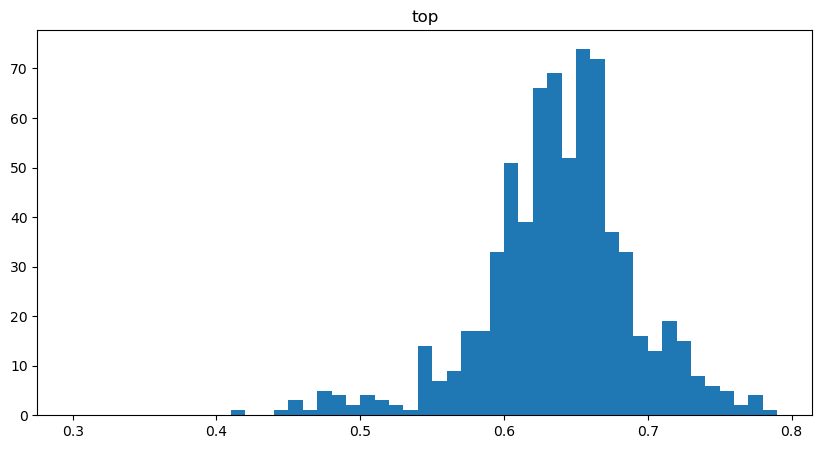

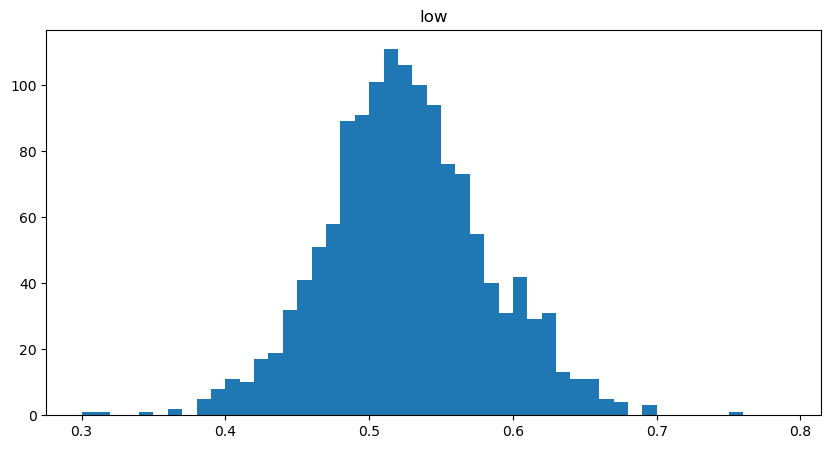

In [14]:
similarity_top, names_top = draw_and_calculate('all_tweet_user[top][agg].csv',top_text,'top')
similarity_low, names_low = draw_and_calculate('all_tweet_user[low][agg].csv',low_text,'low')

## 筛去0.5以下的用户
similarity 与 用户一一对应

In [15]:
def filter_users(similarity, names, min:float) -> list:
    """
    筛选出similarity > min的人群
    """
    ret = []
    for i in tqdm(range(len(names))):
        if similarity.T[0][i] > min:
            ret.append(names[i])
    return ret

In [16]:
names_top_filter = filter_users(similarity_top,names_top, 0.5)
names_low_filter = filter_users(similarity_low,names_low, 0.5)

100%|██████████| 1375/1375 [00:00<00:00, 313143.73it/s]


In [17]:
print(len(names_low),len(names_low_filter),len(names_top),len(names_top_filter))

1375 938 712 695


In [18]:
# 下面去掉
100 * (1375 - 938) / 2964

14.743589743589743

In [19]:
# 上面去掉
100 * (712 - 695) / 2745

0.6193078324225865